## 1. Vehicle Routing Problem

In [151]:
import numpy as np
from Numberjack import *
import matplotlib.pyplot as plt
import networkx as ntx
import random


a) rede de estradas <=> grafo orientado

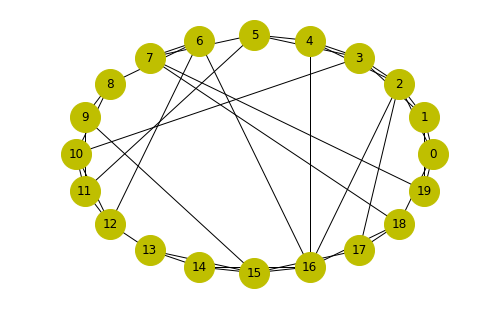

EdgeDataView([(0, 1, {'weight': 2}), (0, 2, {'weight': 2}), (0, 19, {'weight': 8}), (0, 18, {'weight': 1}), (1, 19, {'weight': 8}), (1, 2, {'weight': 3}), (1, 3, {'weight': 1}), (2, 3, {'weight': 6}), (2, 4, {'weight': 2}), (2, 16, {'weight': 7}), (2, 17, {'weight': 3}), (3, 10, {'weight': 9}), (3, 4, {'weight': 8}), (3, 5, {'weight': 3}), (4, 16, {'weight': 1}), (4, 5, {'weight': 5}), (5, 11, {'weight': 3}), (5, 7, {'weight': 7}), (6, 8, {'weight': 4}), (6, 16, {'weight': 8}), (6, 12, {'weight': 6}), (6, 7, {'weight': 7}), (7, 18, {'weight': 7}), (7, 19, {'weight': 2}), (8, 9, {'weight': 9}), (8, 10, {'weight': 1}), (9, 15, {'weight': 5}), (9, 11, {'weight': 5}), (10, 11, {'weight': 1}), (10, 12, {'weight': 2}), (11, 12, {'weight': 5}), (12, 13, {'weight': 4}), (13, 14, {'weight': 3}), (13, 15, {'weight': 9}), (14, 16, {'weight': 9}), (14, 15, {'weight': 6}), (15, 16, {'weight': 9}), (15, 17, {'weight': 7}), (16, 18, {'weight': 1}), (17, 18, {'weight': 6})])

In [152]:

Nodes = 20
Carros = 3
NumClientes = 15

g = ntx.DiGraph()
g = ntx.connected_watts_strogatz_graph(Nodes,4,0.5)

for i, j in g.edges():
    r = np.random.randint(1,10)
    g.add_edge(i,j,weight = r)
    g.add_edge(j,i,weight = r)

ntx.draw_shell(g,arrows=False,node_size=900,node_color='y',with_labels=True)
plt.show()

g.edges(data = True)

b)  $C_{i,j}$ e $t_{i,j}$ 

os carros começam no nodo 0

[0, 2, 2, 3, 3, 6, 10, 8, 11, 14, 10, 9, 12, 14, 11, 11, 2, 5, 1, 8]
[2, 0, 3, 1, 5, 4, 12, 10, 9, 12, 8, 7, 10, 14, 13, 13, 4, 6, 3, 8]
[2, 3, 0, 4, 2, 7, 11, 10, 12, 15, 11, 10, 13, 15, 12, 10, 3, 3, 3, 10]
[3, 1, 4, 0, 6, 3, 12, 10, 8, 11, 7, 6, 9, 13, 14, 14, 5, 7, 4, 9]
[3, 5, 2, 6, 0, 5, 9, 9, 10, 13, 9, 8, 11, 13, 10, 10, 1, 5, 2, 11]
[6, 4, 7, 3, 5, 0, 9, 7, 5, 8, 4, 3, 6, 10, 13, 13, 6, 10, 7, 9]
[10, 12, 11, 12, 9, 9, 0, 7, 4, 11, 5, 6, 6, 10, 13, 16, 8, 14, 9, 9]
[8, 10, 10, 10, 9, 7, 7, 0, 11, 15, 11, 10, 13, 17, 17, 17, 8, 13, 7, 2]
[11, 9, 12, 8, 10, 5, 4, 11, 0, 7, 1, 2, 3, 7, 10, 12, 11, 15, 12, 13]
[14, 12, 15, 11, 13, 8, 11, 15, 7, 0, 6, 5, 8, 12, 11, 5, 14, 12, 15, 17]
[10, 8, 11, 7, 9, 4, 5, 11, 1, 6, 0, 1, 2, 6, 9, 11, 10, 14, 11, 13]
[9, 7, 10, 6, 8, 3, 6, 10, 2, 5, 1, 0, 3, 7, 10, 10, 9, 13, 10, 12]
[12, 10, 13, 9, 11, 6, 6, 13, 3, 8, 2, 3, 0, 4, 7, 13, 12, 16, 13, 15]
[14, 14, 15, 13, 13, 10, 10, 17, 7, 12, 6, 7, 4, 0, 3, 9, 12, 16, 13, 19]
[11, 13, 12, 14, 10, 

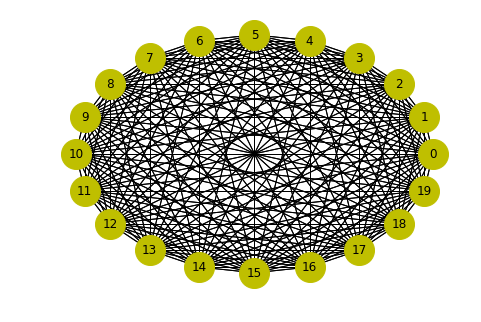

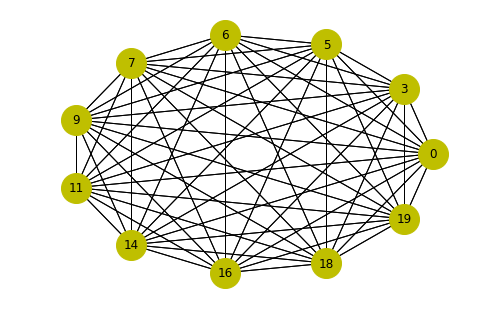

In [153]:
G = ntx.DiGraph()

G.add_nodes_from(g)
EdgesP = []

#inicializar a matriz
for i in range(Nodes):
    EdgesP.append([])
    for j in range(Nodes):
        EdgesP[i].append(-1)
        
#colocar os pesos ja calculados
for i, j, p in g.edges(data = True):
    w = p['weight']
    EdgesP[j][i] = EdgesP[i][j] = w
    G.add_edge(i, j, weight = w)
    G.add_edge(j, i, weight = w)

#calcular os caminhos mais curtos
dic = ntx.shortest_path(G, weight = 'weight')

#colocar os menores pesos
for i in range(Nodes):
    for j in range(Nodes):
        w = 0
        for k in range(len(dic[i][j])-1):
            i1 = dic[i][j][k]
            i2 = dic[i][j][k+1]
            w += EdgesP[i1][i2]
        EdgesP[i][j] = w
        G.add_edge(i,j,weight = w)
        
#criar clientes
Clientes = np.unique(np.random.choice(range(1,Nodes), NumClientes))
NumClientes = len(Clientes)

for i in EdgesP:
    print(i)

#print(G.edges(data=True))
ntx.draw_shell(G,arrows=False,node_size=900,node_color='y',with_labels=True)
plt.show()

G_clientes = G.copy()

for i in range(Nodes):
    if(i not in Clientes and i != 0 ):
        G_clientes.remove_node(i)


ntx.draw_shell(G_clientes,arrows=False,node_size=900,node_color='y',with_labels=True)
plt.show()

c) Restrições

In [154]:

Mat = Matrix(Carros,Nodes**2)
model = Model()

#obrigar a ir apenas aos clientes

for c in range(Carros):
    for i in range(Nodes):
        if(i not in Clientes and i != 0):
            model.add( Sum([ Mat[c][i*Nodes+j]+Mat[c][j*Nodes+i] for j in range(Nodes)]) == 0 )

#Obrigar a que as arestas do tipo (i,i) sejam 0

for c in range(Carros):
    for n in range(Nodes):
        model.add(Mat[c][n*Nodes+n]==0)
        
#Obrigar os clientes a serem atendidos uma unica vez

for c in Clientes.tolist():
    A = [ Mat[i][c*Nodes+j] for i in range(Carros) for j in range(Nodes) ]
    B = [ Mat[i][j*Nodes+c] for i in range(Carros) for j in range(Nodes) ]
    model.add( Sum(A) == 1 )
    model.add( Sum(B) == 1 )

#Obrigar a começar e acabar no 0

for c in range(Carros):
    # p = 1 se o carro esta, p = 0 se o carro nao esta
    p = (Sum([ Mat[c][e] for e in range(Nodes**2)]) > 0)
    model.add( Sum([ Mat[c][0*Nodes + i] for i in range(Nodes)]) == p )
    model.add( Sum([ Mat[c][i*Nodes + 0] for i in range(Nodes)]) == p )
               
#Minimizar o custo

for c in range(Carros):
    model += Minimise(Sum([ EdgesP[i][j]*Mat[c][i*Nodes + j] for i in range(Nodes)\
                                                             for j in range(Nodes)]))

#Minimizar os carros

model += Minimise(Sum([ (Sum([ Mat[c][e] for e in range(Nodes**2)]) > 0) for c in range(Carros)]))

#Verificar que o caminho faz sentido

for c in range(Carros):
    for i in range(Nodes):  
        model.add( Sum([ Mat[c][i*Nodes+j]-Mat[c][j*Nodes+i] for j in range(Nodes)]) == 0 )
        
    #obrigar a que nao haja ciclos distintos
    for i in range(Nodes):
        for j in range(Nodes):
            model.add(  )
    

print()
#print(model)
model.load('SCIP').solve()

True

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

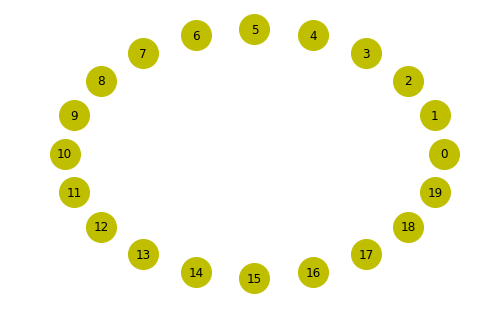

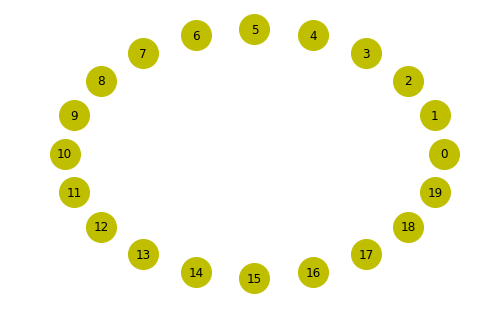

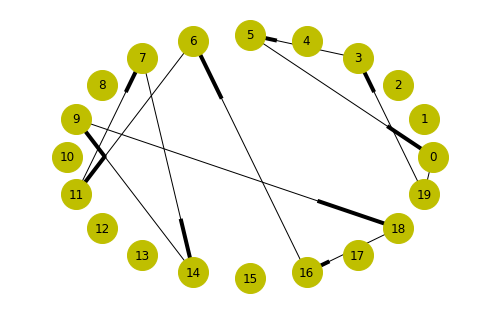

In [155]:
print(Mat)
print()
print(Clientes)

for c in range(Carros):
    Gaux = ntx.DiGraph()

    Gaux.add_nodes_from(g)

    for i in range(Nodes):
        for j in range(Nodes):
            if(Mat[c][i*Nodes+j].get_value()==1):
                Gaux.add_edge(i,j)

    ntx.draw_shell(Gaux,arrows=True,node_size=900,node_color='y',with_labels=True)
    plt.show()

## 2. Sudoku

In [156]:
N = 3
NS = N*N
Gre = Matrix(NS,NS,1,NS)
model = Model()


## Popular a Grelha de Sudoku





Preencher a Grelha
todos os pequenos quadrados têm diferentes números

$\forall_{i< N²}\forall_{j< N²}\forall_{i<i2\leq N²}
\forall_{j<j2\leq N²}\big(M[i,j] =M[i2,j2] \Rightarrow \big(i/N \neq i2/N\big) \vee \big(j/N \neq j2/N\big)  \big)$
        
todas as linhas têm diferentes números

$\forall_{i\leq N²}\forall_{j< N²}\forall_{j<j2\leq N²}\big(M[i,j] \neq M[i,j2] \big)$

todas as colunas têm diferentes números

$\forall_{i< N²}\forall_{i<i2\leq N²}\forall_{j\leq N²}\big(M[i,j] \neq M[i2,j] \big)$


In [157]:
for i in range(N):
    for j in range(N):
        model.add(AllDiff(Gre[i*N:(i+1)*N,j*N:(j+1)*N].flat))
        model.add(AllDiff(Gre[i*N+j]))
        model.add(AllDiff(Gre.col[i*N+j]))



Resolver

In [158]:
model.load('SCIP').solve()

print(Gre)

[[8, 3, 5, 9, 1, 6, 7, 4, 2],
 [7, 6, 9, 4, 5, 2, 3, 1, 8],
 [1, 2, 4, 7, 3, 8, 5, 6, 9],
 [9, 5, 6, 2, 8, 1, 4, 3, 7],
 [3, 8, 7, 6, 9, 4, 1, 2, 5],
 [4, 1, 2, 5, 7, 3, 9, 8, 6],
 [6, 7, 3, 1, 2, 9, 8, 5, 4],
 [2, 9, 1, 8, 4, 5, 6, 7, 3],
 [5, 4, 8, 3, 6, 7, 2, 9, 1]]
